In [213]:
from dataclasses import dataclass
import matplotlib.pyplot as plt

%matplotlib inline

In [214]:
@dataclass
class EpochData:
    learningRate: float
    error: dict

In [215]:
f_modular = "/work/asr4/berger/sisyphus_work_dirs/librispeech/20230420_dfg_multi_speaker/i6_core/returnn/training/ReturnnTrainingJob.M9i1lZeEutAe/work/learning_rates"
f_full = "/work/asr4/berger/sisyphus_work_dirs/librispeech/20230420_dfg_multi_speaker/i6_core/returnn/training/ReturnnTrainingJob.WNWFmfOmtoqr/work/learning_rates"

In [216]:
with open(f_modular, "r") as f:
    mod_data = eval(f.read())

In [217]:
with open(f_full, "r") as f:
    full_data = eval(f.read())

In [218]:
mod_data_list = [mod_data[i].error["dev_score_output_speaker_0"] for i in range(1, 301)]

In [219]:
for idx in range(100, 300):
    if mod_data_list[idx] > 2:
        mod_data_list[idx] = mod_data_list[idx - 20]

In [220]:
full_data_list = [full_data[i].error["dev_score_output_speaker_0"] for i in range(1, 280)]

In [221]:
mod_data_scores = {i: mod_data_list[i-1] for i in range(300)}
mod_data_wer = {40: 25.0, 80: 22.9, 160: 21.8, 240: 17.8, 300: 15.1}

In [222]:
full_data_scores = {i: full_data_list[i-1] for i in range(280)}
full_data_wer = {40: 23.5, 80: 20.7, 160: 19.1, 240: 15.5}

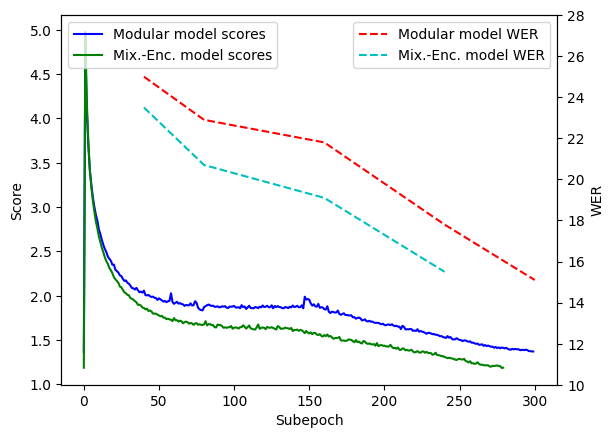

In [223]:
fig, ax1 = plt.subplots()
ax1.plot(list(mod_data_scores.keys()), list(mod_data_scores.values()), "b-", label="Modular model scores")
ax1.plot(list(full_data_scores.keys()), list(full_data_scores.values()), "g-", label="Mix.-Enc. model scores")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xlabel("Subepoch")
ax1.set_ylabel("Score")
ax1.tick_params("y")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(list(mod_data_wer.keys()), list(mod_data_wer.values()), "r--", label="Modular model WER")
ax2.plot(list(full_data_wer.keys()), list(full_data_wer.values()), "c--", label="Mix.-Enc. model WER")
ax2.set_ylabel("WER")
ax2.set_ylim(10, 28)
ax2.tick_params("y")
ax2.legend(loc="upper right")

plt.savefig("plot.png", dpi=300)

plt.show()